In [6]:
from datasets import load_dataset

DATASET_NAME =  "jdelavande/ultrachat_200k-with-thanks"
DATASET_NAME =  "jdelavande/ultrachat_200k-Llama-3-8B-Instruct-with-thanks"
#DATASET_NAME = "HuggingFaceH4/ultrachat_200k"

In [7]:
data = load_dataset(DATASET_NAME, split="train[:-1]")
data

Dataset({
    features: ['conversation_with_thanks', 'conversation_without_thanks'],
    num_rows: 9999
})

In [8]:
count_messages = {}
for conversation in data["messages"]:
    count_messages[len(conversation)] = count_messages.get(len(conversation), 0) + 1
print("Number of conversations with different lengths:")
for length, count in sorted(count_messages.items()):
    print(f"{length}: {count}")


Number of conversations with different lengths:
3: 11
5: 67121
7: 67879
9: 55551
11: 9577
13: 4264
15: 3460


In [9]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B-Instruct")
first = tokenizer(data["conversation_with_thanks"][0])
len(first["input_ids"]), len(first["attention_mask"])

(679, 679)

Number of conversations with different input token lengths:


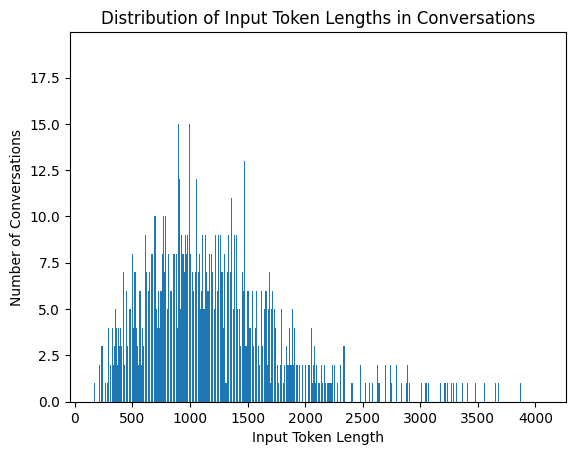

In [11]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B-Instruct")
count_input_tokens = {}
for conversation in data["conversation_with_thanks"]:
    count_tokens = len(tokenizer(conversation)["input_ids"])
    count_input_tokens[count_tokens] = count_input_tokens.get(count_tokens, 0) + 1
print("Number of conversations with different input token lengths:")
import matplotlib.pyplot as plt
plt.bar(count_input_tokens.keys(), count_input_tokens.values())
plt.xlabel("Input Token Length")
plt.ylabel("Number of Conversations")
plt.title("Distribution of Input Token Lengths in Conversations")
plt.show()


In [5]:
data['conversation_with_thanks'][0]

"<|begin_of_text|>\n<|start_header_id|>user<|end_header_id|>\n\nThese instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme's built-in settings!\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nThis feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nCan you guide me through the process of enabling the secondary image hover feature on my Collection page

In [4]:
data['conversation_with_thanks'][0].split("<|eot_id|>")

["<|begin_of_text|>\n<|start_header_id|>user<|end_header_id|>\n\nThese instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme's built-in settings!\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?",
 '<|start_header_id|>assistant<|end_header_id|>\n\nThis feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.',
 '<|start_header_id|>user<|end_header_id|>\n\nCan you guide me through the process of enabling the secondary image hover feature on my Collection pages and Fea

In [4]:
!nvidia-smi

Fri May 30 13:26:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          On  |   00000000:64:00.0 Off |                    0 |
| N/A   38C    P0            153W /  700W |   31722MiB /  81559MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [4]:
from transformers import pipeline
pipe = pipeline(
    "text-generation",
    model="meta-llama/Llama-3.1-8B-Instruct",
    device=0,
    max_new_tokens=128,
)


Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.10s/it]
Device set to use cuda:0


In [5]:
pipe(data["messages"][0])

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


[{'generated_text': [{'content': "These instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme's built-in settings!\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?",
    'role': 'user'},
   {'content': 'This feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.',
    'role': 'assistant'},
   {'content': 'Can you guide me through the process of enabling the secondary image hover feature on my Collection pages and Featured Collections sections?',
    'role': 'user'}

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B-Instruct")
inputs = tokenizer("<|eot_id|>")

In [22]:
inputs

{'input_ids': [128000, 128009], 'attention_mask': [1, 1]}

In [28]:
tokenizer.decode(128001)

'<|end_of_text|>'

In [23]:
res = pipe(prompt)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [24]:
res[0]['generated_text'].split("<|eot_id|>")

["<|begin_of_text|>\n<|start_header_id|>user<|end_header_id|>\n\nThese instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme's built-in settings!\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?",
 '<|start_header_id|>assistant<|end_header_id|>\n\nThis feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.',
 '<|start_header_id|>user<|end_header_id|>\n\nCan you guide me through the process of enabling the secondary image hover feature on my Collection pages and Fea

In [12]:
res[0]['generated_text']

"<|begin_of_text|>\n<|start_header_id|>user<|end_header_id|>\n\nThese instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme's built-in settings!\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nThis feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nCan you guide me through the process of enabling the secondary image hover feature on my Collection page

## code carbon measures

In [ ]:
from transformers import pipeline
from datasets import load_dataset
from codecarbon import EmissionsTracker
import pandas as pd
import torch
import time
from tqdm import tqdm


# Initialisation du pipeline
pipe = pipeline(
    "text-generation",
    model="meta-llama/Llama-3.1-8B-Instruct",
    device=0,
    max_new_tokens=128,
)




/fsx/jdelavande/miniconda3/envs/benchlab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.01s/it]
Device set to use cuda:0


In [34]:
# Paramètres
DATASET_NAME = "jdelavande/ultrachat_200k-Llama-3-8B-Instruct-with-thanks"
SPLIT = "train"
N_SAMPLES = 1  # à adapter si tu veux tout faire
OUT_CSV = "ultrachat_energy_measurements.csv"

# Charger le dataset (extrait 10 000 premiers exemples)
dataset = load_dataset(DATASET_NAME, split=SPLIT).select(range(N_SAMPLES))


Generating train split: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 58472.28 examples/s]


In [35]:
dataset[0]['conversation_with_thanks']

"<|begin_of_text|>\n<|start_header_id|>user<|end_header_id|>\n\nThese instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme's built-in settings!\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nThis feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nCan you guide me through the process of enabling the secondary image hover feature on my Collection page

In [22]:
tokenizer = pipe.tokenizer

In [ ]:

# Liste pour stocker les résultats
results = []

# Mesure et génération
for item in tqdm(dataset, desc="Measuring generations"):
    prompt = item['conversation_with_thanks']

    tracker = EmissionsTracker(
        #measure_power_secs=0.1,
        log_level="error",
        output_file=None,
        save_to_file=False,
    )

    inputs = pipe.tokenizer(prompt, return_tensors="pt").to(pipe.device)
    

    # prefill
    tracker.start()
    start = time.time()
    with torch.no_grad():
        outputs = pipe.model.generate(
            **inputs,
            max_new_tokens=1,
            do_sample=False,
            return_dict_in_generate=True,
        )
    end = time.time()
    emissions: dict = tracker.stop()

    duration_prefill = end - start
    energy_prefill_cpu = tracker._total_cpu_energy.kWh
    energy_prefill_gpu = tracker._total_gpu_energy.kWh

    # generate
    tracker.start()
    start = time.time()
    with torch.no_grad():
        generated = pipe.model.generate(
            **inputs,
            max_new_tokens=128,
            do_sample=False,
            return_dict_in_generate=True,
        )
    generated = pipe.tokenizer.decode(generated.sequences[0], skip_special_tokens=True)
    end = time.time()

    emissions: dict = tracker.stop()

    duration_generate = end - start
    energy_generate_cpu = tracker._total_cpu_energy.kWh
    energy_generate_gpu = tracker._total_gpu_energy.kWh

    # decode
    duration_decode = duration_generate - duration_prefill
    energy_cpu_decode = energy_generate_cpu - energy_prefill_cpu
    energy_gpu_decode = energy_generate_gpu - energy_prefill_gpu

    prompt_tokens = len(pipe.tokenizer(prompt, skip_special_tokens=False)["input_ids"])
    response_tokens = len(pipe.tokenizer(generated, skip_special_tokens=False)["input_ids"]) - prompt_tokens
    response = generated.split("<|eot_id|>")[-1]

    results.append({
        "prompt": prompt,
        "response": generated,
        "prompt_tokens": prompt_tokens,
        "response_tokens": response_tokens,
        "duration_prefill": duration_prefill,
        "duration_generate": duration_generate,
        "duration_decode": duration_decode,
        "energy_prefill_cpu": energy_prefill_cpu,
        "energy_prefill_gpu": energy_prefill_gpu,
        "energy_generate_cpu": energy_generate_cpu,
        "energy_generate_gpu": energy_generate_gpu,
        "energy_cpu_decode": energy_cpu_decode,
        "energy_gpu_decode": energy_gpu_decode,
    })

# Sauvegarde CSV
df = pd.DataFrame(results)
df.to_csv(OUT_CSV, index=False)
print(f"Résultats sauvegardés dans {OUT_CSV}")


Measuring generations:   0%|                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Measuring generations: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.24s/it]

Résultats sauvegardés dans ultrachat_energy_measurements.csv


In [37]:
df

,prompt,response,prompt_tokens,response_tokens,duration_prefill,duration_generate,duration_decode,energy_prefill_cpu,energy_prefill_gpu,energy_generate_cpu,energy_generate_gpu,energy_cpu_decode,energy_gpu_decode
0,<|begin_of_text|>\n<|start_header_id|>user<|en...,\nuser\n\nThese instructions apply to section-...,683,12,0.245482,1.347342,1.10186,0.000009,0.000062,0.000026,0.00023,0.000017,0.000168


In [17]:
tracker._total_cpu_energy.kWh

9.37894555972889e-06

In [18]:
tracker._total_gpu_energy.kWh

6.778838746868132e-05

In [13]:
dir(tracker)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_active_task',
 '_allow_multiple_runs',
 '_api_call_interval',
 '_api_endpoint',
 '_api_key',
 '_cloud',
 '_co2_signal_api_token',
 '_compute_emissions_delta',
 '_conf',
 '_cpu_power',
 '_data_source',
 '_do_measurements',
 '_emissions',
 '_emissions_endpoint',
 '_experiment_id',
 '_experiment_name',
 '_external_conf',
 '_force_cpu_power',
 '_force_mode_cpu_load',
 '_force_ram_power',
 '_geo',
 '_get_cloud_metadata',
 '_get_geo_metadata',
 '_gpu_ids',
 '_gpu_power',
 '_hardware',
 '_init_output_methods',
 '_last_measured_ti

In [19]:
tracker.get_energy_consumed_cpu()

AttributeError: 'EmissionsTracker' object has no attribute 'get_energy_consumed_cpu'